In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # used for plot interactive graph. 

import plotly.express as px

from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
greypartridge_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/greypartridge/greypartridge_features.csv')
stockdove_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/stockdove/stockdove_features.csv')
turtledove_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/turtledove/turtledove_features.csv')
yellowhammer_data = pd.read_csv('D:/UK/assignment/DSA8023/Analython_2/yellowhammer/yellowhammer_features.csv')

In [3]:
bird_cat = {'turtledove': 0, 'greypartridge': 1, 'yellowhammer': 2, 'stockdove': 3}

turtledove_data['bird'] = 0
greypartridge_data['bird'] = 1
yellowhammer_data['bird'] = 2
stockdove_data['bird'] = 3

bird_df = pd.concat([turtledove_data, greypartridge_data, yellowhammer_data, stockdove_data]).reset_index(drop=True)

def strip_clip_label(s):
    return s.split('-')[2].split('_')[0]

bird_df['clip'] = bird_df['clip'].apply(strip_clip_label)


In [4]:
bird_df.describe().T

count        mean         std  min         25%  \
Unnamed: 0              4000.0  499.500000  288.711081  0.0  249.750000   
zcr_mean                4000.0    0.091769    0.080141  0.0    0.027957   
energy_mean             4000.0    0.025225    0.020509  0.0    0.008869   
energy_entropy_mean     4000.0    2.977298    0.204193  0.0    2.810897   
spectral_centroid_mean  4000.0    0.167472    0.076397  0.0    0.107946   
...                        ...         ...         ...  ...         ...   
delta chroma_10_std     4000.0    0.008565    0.009337  0.0    0.002591   
delta chroma_11_std     4000.0    0.016833    0.013740  0.0    0.006606   
delta chroma_12_std     4000.0    0.007191    0.009720  0.0    0.001298   
delta chroma_std_std    4000.0    0.013388    0.009542  0.0    0.005250   
bird                    4000.0    1.500000    1.118174  0.0    0.750000   

                               50%         75%         max  
Unnamed: 0              499.500000  749.250000  999.000000  
zcr_mean                  0.069213    0.131529    0.600757  
energy_mean               0.019994    0.037150    0.146312  
energy_entropy_mean       3.011240    3.139923    3.308648  
spectral_centroid_mean    0.148718    0.209444    0.533820  
...                            ...         ...         ...  
delta chroma_10_std       0.005243    0.010606    0.071783  
delta chroma_11_std       0.012775    0.023401    0.126624  
delta chroma_12_std       0.003696    0.008498    0.080783  
delta chroma_std_std      0.010191    0.022374    0.043129  
bird                      1.500000    2.250000    3.000000  

[138 rows x 8 columns]

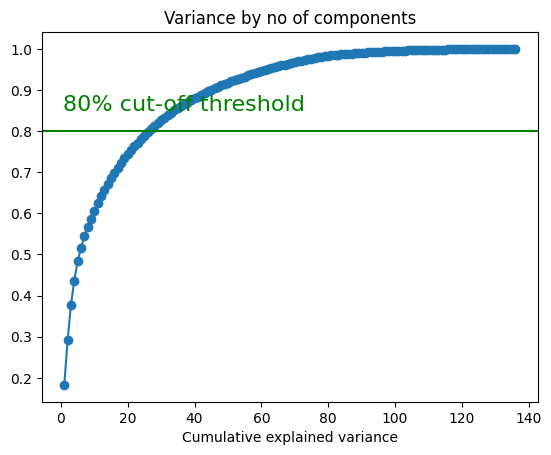

shape of pca (4000, 27)


In [5]:

from sklearn.decomposition import PCA

df_2 = bird_df.copy()

df_2 = df_2.drop(columns=['Unnamed: 0', 'bird', 'clip'])

scaler = StandardScaler()
data_rescaled = scaler.fit_transform(df_2)

pca = PCA(n_components = 0.80)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)


pca = PCA(n_components=len(df_2.columns)).fit(data_rescaled)

plt.figure()
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')

plt.title('Variance by no of components')
plt.xlabel('No of components')
plt.xlabel('Cumulative explained variance')

plt.axhline(y=0.80, color='g', linestyle='-')
plt.text(0.5, 0.85, '80% cut-off threshold', color = 'green', fontsize=16)

# ax.grid(axis='x')
plt.show()

print('shape of pca {}'.format(reduced.shape))

def constructCols(len):
    feature_cols = []
    for i in range(0,len):
        feature_cols.append('Feature{}'.format(i))

    return feature_cols



In [6]:
pca_features = len(reduced[0])

In [7]:
# df_2.cov().to_excel('D:/UK/assignment/DSA8023/Analython_2/covariance.xlsx')

In [8]:
pca.explained_variance_ratio_ * 100

array([1.82695985e+01, 1.08687895e+01, 8.63934530e+00, 5.87513063e+00,
       4.72951840e+00, 3.19232558e+00, 2.86611801e+00, 2.15713946e+00,
       2.03187994e+00, 1.91634031e+00, 1.86676273e+00, 1.75686382e+00,
       1.59572826e+00, 1.47560932e+00, 1.32968827e+00, 1.26861205e+00,
       1.24139217e+00, 1.20253373e+00, 1.12904485e+00, 1.00272570e+00,
       9.46607454e-01, 9.26239043e-01, 8.88963531e-01, 8.84028521e-01,
       8.20197916e-01, 7.97614693e-01, 7.71471370e-01, 7.42654637e-01,
       7.14533478e-01, 7.07470550e-01, 6.57746857e-01, 6.11838910e-01,
       5.93102870e-01, 5.54166940e-01, 5.46545239e-01, 5.23769188e-01,
       4.89784965e-01, 4.83380033e-01, 4.67335312e-01, 4.49299930e-01,
       4.30896673e-01, 4.18993720e-01, 4.09809073e-01, 3.96694002e-01,
       3.87655720e-01, 3.74874034e-01, 3.63317050e-01, 3.54917076e-01,
       3.51463389e-01, 3.12186788e-01, 3.09671336e-01, 2.99585975e-01,
       2.95407757e-01, 2.87140467e-01, 2.84068827e-01, 2.76977611e-01,
      

In [9]:
final_df = pd.DataFrame(reduced, columns=constructCols(len(reduced[0])))

df_2 = final_df.copy()

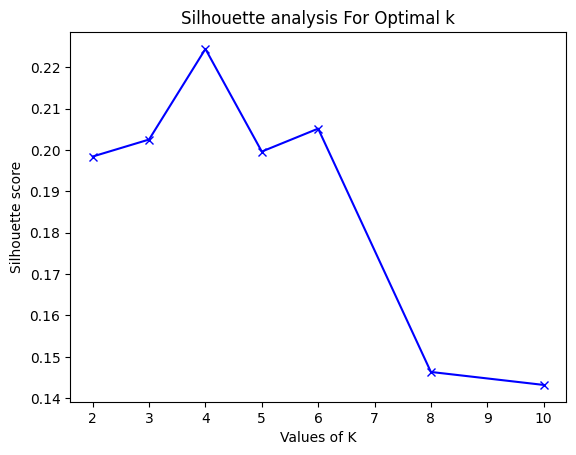

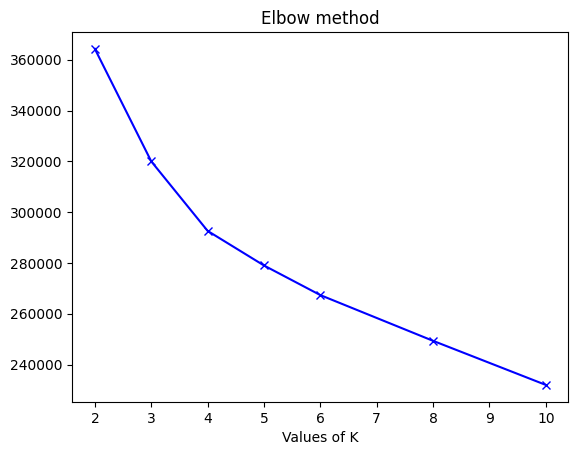

In [10]:
range_n_clusters = [2, 3, 4, 5, 6, 8 , 10]
silhouette_avg = []
wcss = []

for num_clusters in range_n_clusters:
 
 # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, n_init=10)
    kmeans.fit(df_2)
    cluster_labels = kmeans.labels_
    silhouette_avg.append(silhouette_score(df_2, cluster_labels))
    wcss.append(kmeans.inertia_)

plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

# elbow method
plt.plot(range_n_clusters, wcss, 'bx-') 
plt.xlabel('Values of K') 
plt.title('Elbow method')
plt.show()

In [11]:
def distance_from_center(feature1,feature2, label, model):
#     Calculate the Euclidean distance between a data point and the center of its cluster.
    feature1_center =  model.cluster_centers_[label,0]
    feature2_center =  model.cluster_centers_[label,1]
    distance = np.sqrt((feature1 - feature1_center) ** 2 + (feature2 - feature2_center) ** 2)
    return np.round(distance, 3)

def detect_outliers(r_data):
    outliers = []
    outlier_idx = []
    data = sorted(r_data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for idx, i in enumerate(r_data): 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
            outlier_idx.append(idx)

    return outliers, outlier_idx

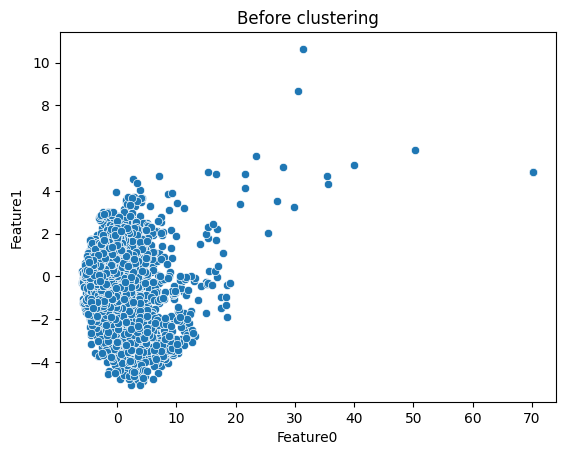

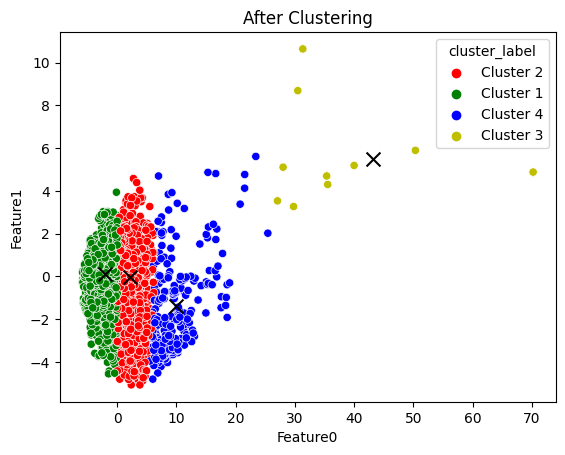

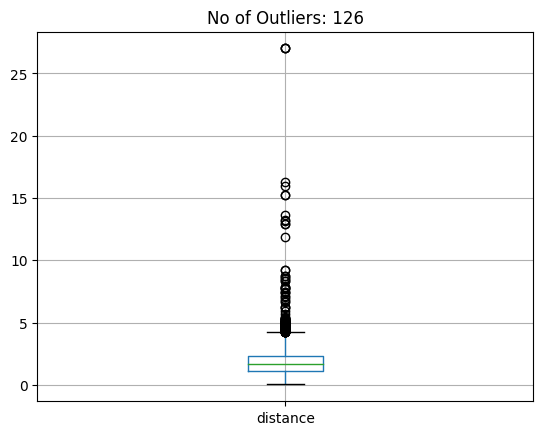

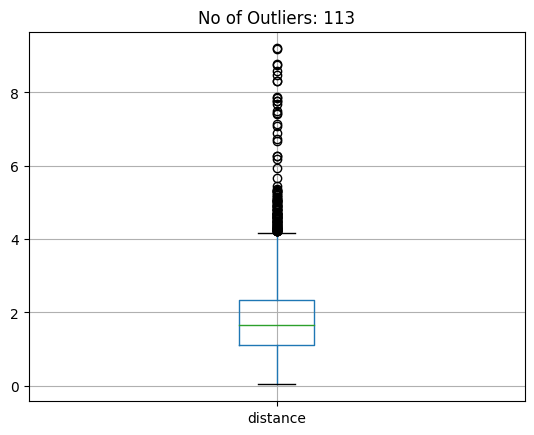

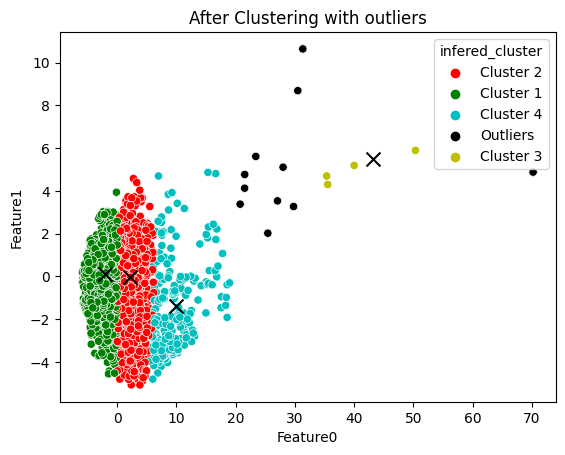

In [29]:
# we can consider no of classes as 4

mod_df = bird_df.copy()

mod_df = mod_df.drop(columns=['Unnamed: 0', 'bird', 'clip'])

scaler = StandardScaler()
data_rescaled = scaler.fit_transform(mod_df)

pca_mod = PCA(n_components=pca_features)

pca_mod.fit(mod_df)
mod_t = pca_mod.transform(mod_df)

k_mod = KMeans(n_clusters=4, n_init = 10, init='k-means++', random_state=42)

classes = k_mod.fit_predict(mod_t)

final_df = pd.concat([mod_df.reset_index(drop=True), pd.DataFrame(mod_t, columns=constructCols(pca_features))], axis=1)
final_df['cluster_label'] = k_mod.labels_
final_df['distance'] = distance_from_center(final_df['Feature0'], final_df['Feature1'], final_df['cluster_label'], k_mod)
centroids = np.array(k_mod.cluster_centers_)

outliers, all_outlier_idx = detect_outliers(final_df['distance'])
outliers_idx = list(final_df.sort_values('distance', ascending=False).head(13).index)

no_of_outliers = len(outliers_idx)

final_df['infered_cluster'] = k_mod.labels_
final_df.loc[outliers_idx, ['infered_cluster']] = 4

outliers_df = final_df[final_df.index.isin(outliers_idx)]

final_df['cluster_label'] = final_df['cluster_label'].replace({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4'})
final_df['infered_cluster'] = final_df['infered_cluster'].replace({0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3', 3:'Cluster 4', 4: 'Outliers'})
final_df['bird'] = bird_df['bird'].replace({0:'turtledove', 1:'greypartridge', 2:'yellowhammer', 3:'stockdove'})

plt.figure()
sns.scatterplot(data = final_df, x='Feature0', y='Feature1') # ,palette=['r','g','b','y'])
plt.title('Before clustering')
plt.show()

# plot 2D scatter plot to cluster
plt.figure()
sns.scatterplot(data = final_df, x='Feature0', y='Feature1', hue="cluster_label", palette=['r','g','b','y'])
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k', s=100)
plt.title('After Clustering')
plt.show()


plt.figure()
final_df.boxplot(column=['distance'])
plt.title('No of Outliers: {}'.format(len(all_outlier_idx))) 
plt.suptitle('') # that's what you're after
plt.show()

plt.figure()
final_df.drop(outliers_idx).boxplot(column=['distance'])
plt.title('No of Outliers: {}'.format(len(all_outlier_idx) - no_of_outliers)) 
plt.suptitle('') # that's what you're after
plt.show()
                

# plot 2D scatter plot to cluster
plt.figure()
sns.scatterplot(data = final_df, x='Feature0', y='Feature1', hue="infered_cluster", palette=['r','g','c','k','y'])
plt.scatter(centroids[:,0], centroids[:,1], marker="x", color='k', s=100)
plt.title('After Clustering with outliers')
plt.show()
                                  

                                                               
fig = px.scatter_3d(final_df, x='Feature0', y='Feature1', z='Feature2',color='infered_cluster', color_discrete_sequence=['red','green', 'cyan','black','yellow'])
fig.show()


In [20]:
final_df

zcr_mean  energy_mean  energy_entropy_mean  spectral_centroid_mean  \
0     0.011638     0.050834             2.853885                0.099427   
1     0.010017     0.057297             2.813399                0.082873   
2     0.015215     0.068881             2.795053                0.095137   
3     0.011189     0.034225             2.702995                0.082235   
4     0.011030     0.032752             2.766372                0.074071   
...        ...          ...                  ...                     ...   
3995  0.035660     0.019261             3.015872                0.113698   
3996  0.048655     0.010251             3.137959                0.146068   
3997  0.053139     0.019099             3.159952                0.155577   
3998  0.046886     0.040596             3.129344                0.143646   
3999  0.043927     0.044455             3.100899                0.131916   

      spectral_spread_mean  spectral_entropy_mean  spectral_flux_mean  \
0                 0.173850               0.071243            0.028693   
1                 0.164734               0.034126            0.032855   
2                 0.172075               0.084550            0.031939   
3                 0.167820               0.019354            0.025433   
4                 0.153820               0.052909            0.032506   
...                    ...                    ...                 ...   
3995              0.194203               0.092572            0.012418   
3996              0.229095               0.207418            0.005083   
3997              0.236316               0.237278            0.004760   
3998              0.227443               0.187944            0.005592   
3999              0.205796               0.223043            0.006209   

      spectral_rolloff_mean  mfcc_1_mean  mfcc_2_mean  ...  Feature21  \
0                  0.010067   -27.705908     2.196129  ...  -0.062444   
1                  0.010925   -26.172730     2.682754  ...   0.009586   
2                  0.011850   -25.221283     2.397864  ...   0.018405   
3                  0.016007   -26.878422     2.861007  ...  -0.014009   
4                  0.009891   -28.063638     2.724388  ...   0.000509   
...                     ...          ...          ...  ...        ...   
3995               0.039125   -24.929633     3.419842  ...   0.040423   
3996               0.051900   -24.002207     2.942440  ...   0.039803   
3997               0.056250   -23.104782     2.794707  ...   0.003735   
3998               0.049950   -22.240674     3.015739  ...  -0.002273   
3999               0.044650   -22.395337     2.777818  ...   0.071862   

      Feature22  Feature23  Feature24  Feature25  Feature26  cluster_label  \
0      0.019876  -0.057590   0.150503  -0.212528  -0.133852      Cluster 2   
1     -0.024899  -0.067546   0.157822  -0.167688  -0.105033      Cluster 1   
2     -0.024162  -0.061018   0.136960  -0.145396  -0.087998      Cluster 1   
3      0.106783  -0.049678  -0.034209  -0.026802  -0.005398      Cluster 1   
4      0.022484  -0.052746  -0.047347  -0.080901  -0.040367      Cluster 2   
...         ...        ...        ...        ...        ...            ...   
3995   0.015599  -0.084323  -0.038940   0.050614   0.053705      Cluster 1   
3996  -0.024638  -0.053872   0.040666   0.042931   0.087668      Cluster 1   
3997  -0.025385  -0.049451   0.006849   0.052382   0.093826      Cluster 1   
3998  -0.038462  -0.000996   0.039517   0.070806   0.078840      Cluster 1   
3999   0.008409  -0.011164   0.072256   0.071715   0.078436      Cluster 1   

      distance  infered_cluster        bird  
0        2.208        Cluster 2  turtledove  
1        1.843        Cluster 1  turtledove  
2        1.085        Cluster 1  turtledove  
3        2.724        Cluster 1  turtledove  
4        2.288        Cluster 2  turtledove  
...        ...              ...         ...  
3995     1.637        Cluster 1   stockdove  
3996     1.503        Cluster 1   

In [ ]:
# no_of_outliers

In [ ]:
# since we determined 4 clusters


In [ ]:
# bird_df.boxplot(column=[ 'zcr_mean'])





In [ ]:
# for i in range(0,4):
#     temp_df = final_df[final_df.cluster_label == i ]
#     print(temp_df)
#     no_of_outlier = detect_outliers_iqr(temp_df['distance'])
#     temp_df.boxplot(column=['distance'])
#     print(no_of_outlier)
#     if no_of_outlier > 0:
#          outliers_idx.extend(list(temp_df.sort_values('distance', ascending=False).head(no_of_outlier).index))
